In [54]:
# import the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
%matplotlib inline

In [55]:
# read the dataset into pandas dataframe
df = pd.read_csv('hotel_bookings.csv')

In [56]:
# check the head
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [57]:
# get the features info including the null value and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

It is quite a lot of feature. I prefer to identify the type of the feature first. Usually, I seperate them into categorical or numeric. As we can see that the dataset has more numerical feature than the categorical feature, sot it's more easier to evaluate the categorical feature fist. The next question is how? We can use the data type of the feature to identify the feature. From my observation, the 'object' data type is the only data type that exist beside the numeric type. I'd like to use this condition to get the categorical feature.

In [58]:
# make a list that seperate between categorical and numeric
feat_types = pd.DataFrame(df.dtypes,columns=['type'])
feat_types.reset_index(inplace=True)
feat_types.rename(columns={'index':'feature'},inplace=True)
cat_feat = feat_types[feat_types['type']  == 'object']
num_feat = feat_types[feat_types['type'] != 'object']

Then, the second thing that I'd like to know is the amount of the unique element in each categorical feature because it would give me insight which type of plot that I will use. For instance, the categorical feature that has less than 5 unique value is a good fit for the count plot. However, if the number of unique value exceed 10, instead the value of the count itself, it is more wise to get the distribution of the count.

In [59]:
# get the amount of unique value in each categorical feature
for f in cat_feat['feature']:
    print(f"{f} : {df[f].nunique()}")

hotel : 2
arrival_date_month : 12
meal : 5
country : 177
market_segment : 8
distribution_channel : 5
reserved_room_type : 10
assigned_room_type : 12
deposit_type : 3
customer_type : 4
reservation_status : 3
reservation_status_date : 926


'country' and 'reservation_status_date' have unique value grater than 20.

In [60]:
# lets see the unique value of categorical feature that has unique value less than 15
for f in cat_feat['feature']:
    if df[f].nunique() <= 15:
        print(f"{f} : {df[f].unique()}")

hotel : ['Resort Hotel' 'City Hotel']
arrival_date_month : ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal : ['BB' 'FB' 'HB' 'SC' 'Undefined']
market_segment : ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
distribution_channel : ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
reserved_room_type : ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
assigned_room_type : ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
deposit_type : ['No Deposit' 'Refundable' 'Non Refund']
customer_type : ['Transient' 'Contract' 'Transient-Party' 'Group']
reservation_status : ['Check-Out' 'Canceled' 'No-Show']


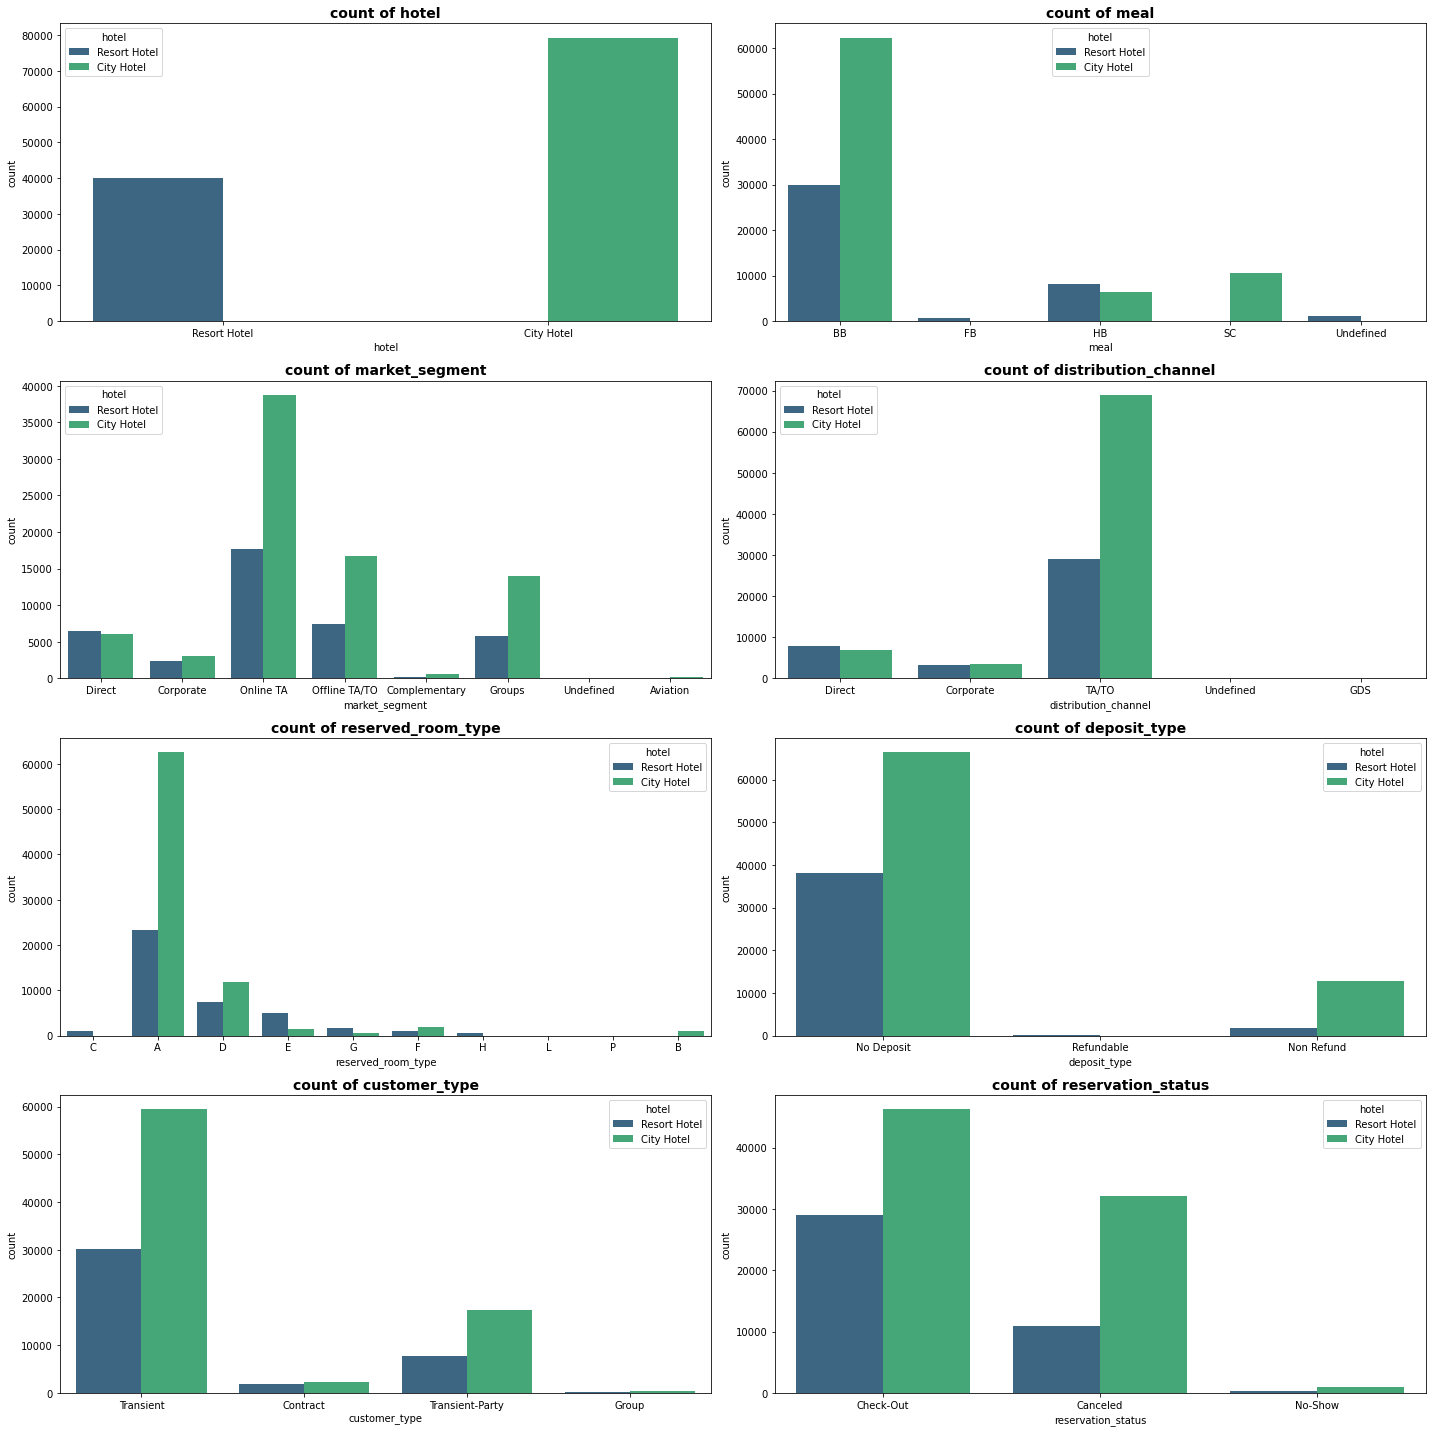

In [62]:
# create the count plot for the categorical feature that has unique value less than 10
# seperate them by type of the hotel
fig, ax = plt.subplots(nrows=4,ncols=2,figsize=(20,20))
for i,f in list(enumerate(list(cat_feat[(cat_feat['feature'] != 'country') & (cat_feat['feature'] != 'reservation_status_date') & (cat_feat['feature'] != 'assigned_room_type') & (cat_feat['feature'] != 'arrival_date_month') ]['feature']))):
    sns.countplot(df[f],ax=fig.axes[i],hue=df['hotel'],palette='viridis')
    fig.axes[i].set_title(f"count of {f}",fontweight='bold',fontsize=14)

plt.tight_layout()
plt.show()

The highest count for each feature :
- **hotel** : City Hotel
- **meal** : BB (Bead and Breakfast)
- **market segment** : Online TA (Travel Agent)
- **distribution_channel** : TA/TO
- **reserved_room_type** : A
- **deposit_type** : No Deposit
- **customer_type** : Transient
- **reservation_status** : Check-Out

It is interesting that the amount of cancelation is almost a half of the check-out. I'm very surprise until I realize that the majority of the deposit type is 'No Deposit'. It make sense, people will easily cancel their booking if they wouldn't loose their money for doing that. Another fact is the majority of the customers is come from onlline travel agent market segment.

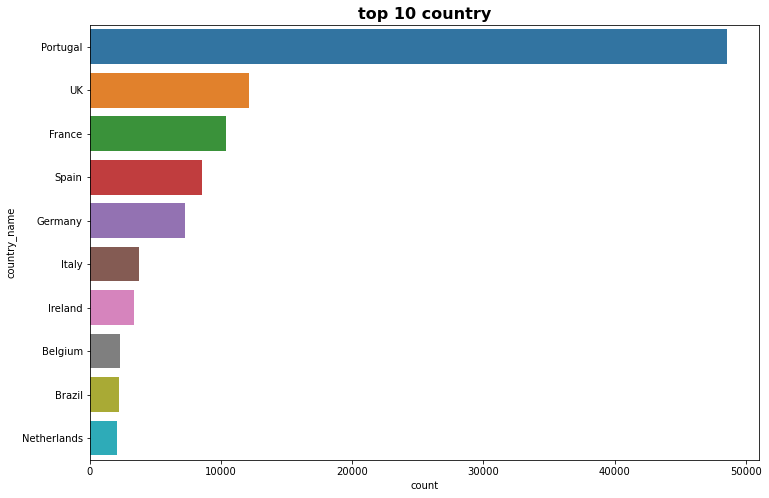

In [63]:
# for the country I still want to get the count by picking top 10 country with the highest number of bookings
top_10_country = pd.DataFrame(df['country'].value_counts().head(10))
top_10_country.reset_index(inplace=True)
country_name = ['Portugal','UK','France','Spain','Germany','Italy','Ireland','Belgium','Brazil','Netherlands']
top_10_country = pd.concat([top_10_country,pd.Series(country_name)],axis=1)
top_10_country
top_10_country.rename(columns={'index':'country_code','country':'count',0:'country_name'},inplace=True)
top_10_country
plt.figure(figsize=(12,8))
sns.barplot(x='count',y='country_name',data=top_10_country)
plt.title('top 10 country',fontsize=16,fontweight='bold')
plt.show()

As we can see that Portugal has extremely high count value compared to another country. It suggest that this hotel bookings dataset is originated from Portugal.

In [64]:
# create month order for hue_order in the visualization
month_order =['January','February','March','April','May','June','July','August','September','October','November','December']

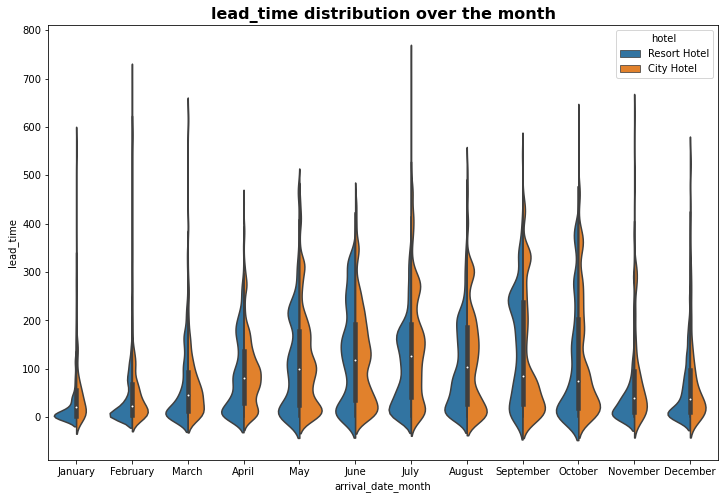

In [65]:
# check the distribution profile of lead_time using violing plot
plt.figure(figsize=(12,8))
sns.violinplot('arrival_date_month','lead_time',hue='hotel',split=True,data=df,order=month_order)
plt.title('lead_time distribution over the month',fontsize=16,fontweight='bold')
plt.show()

From above plot, the average for lead_time will be higher during the summer especially for the Resort Hotel.

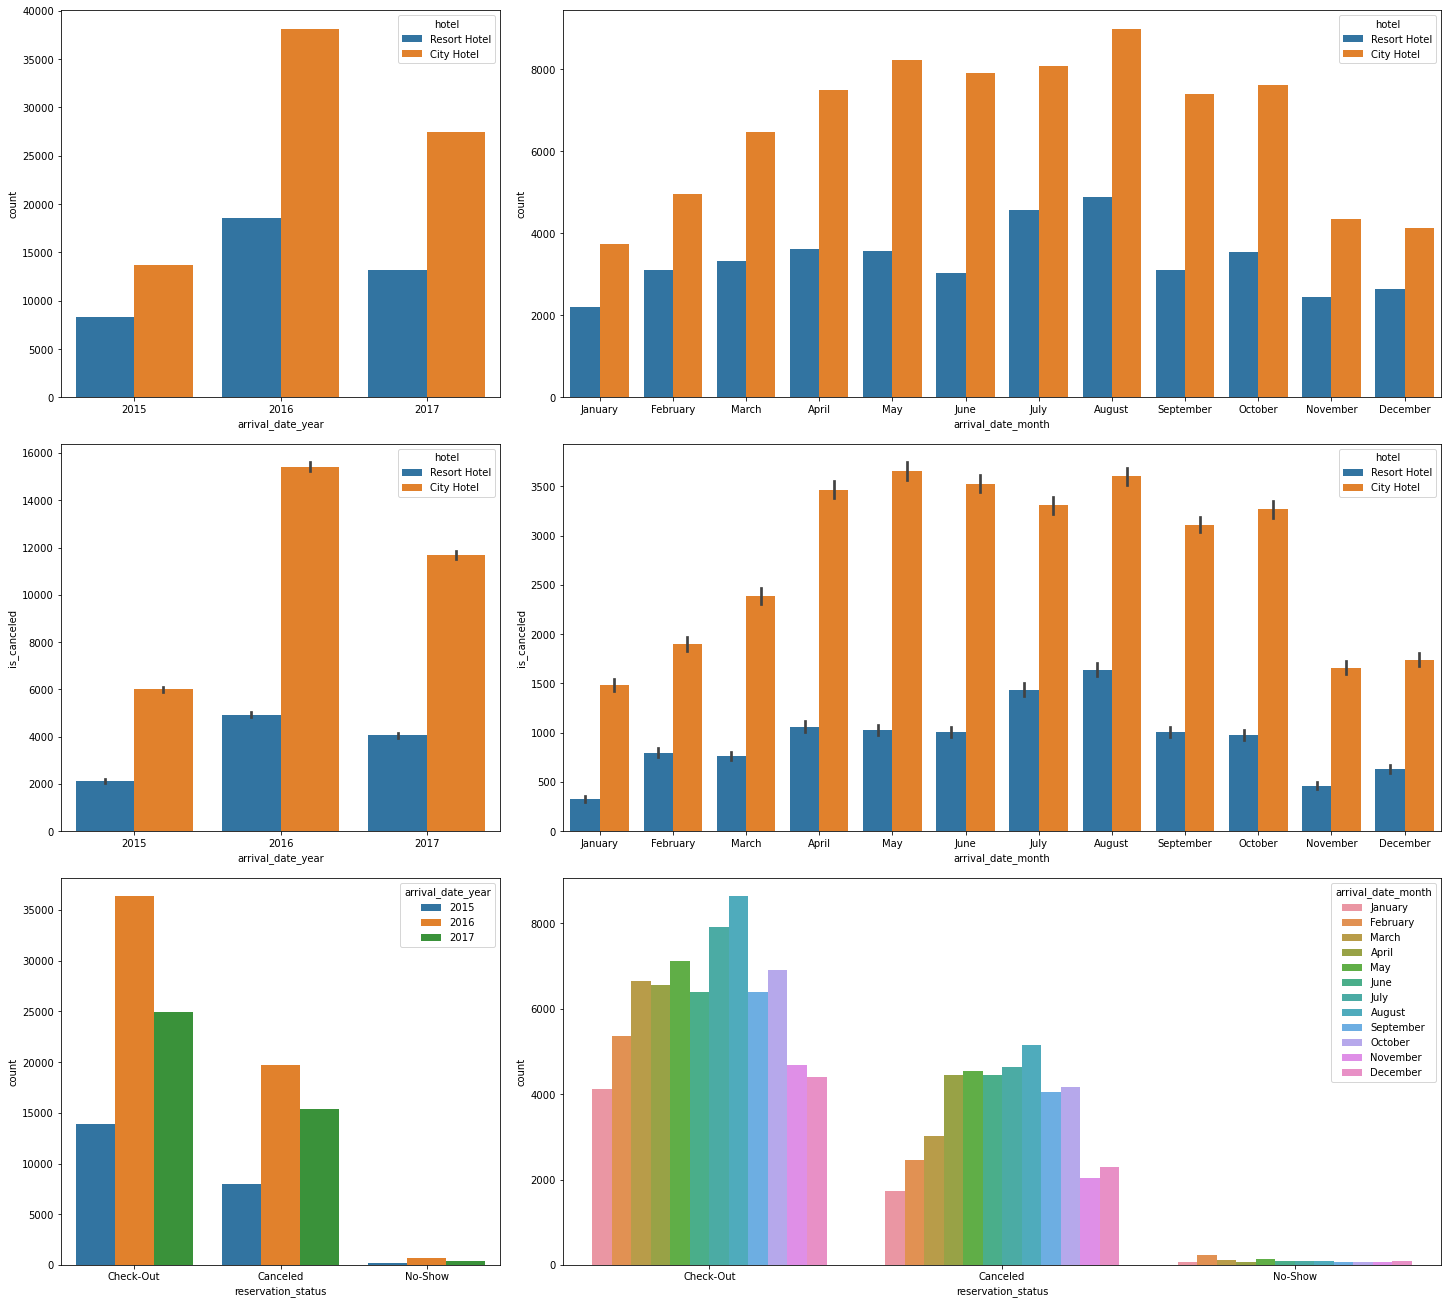

In [66]:
# visualize the amount of the cancelation over the year and the month
# see the difference between resort hotel and city hotel
fig2 = plt.figure(constrained_layout=True,figsize=(20,18))
gs2 = gridspec.GridSpec(nrows=3,ncols=3,figure=fig2)
ax1 = fig2.add_subplot(gs2[0,0])
ax2 = fig2.add_subplot(gs2[0,1:])
ax3 = fig2.add_subplot(gs2[1,0])
ax4 = fig2.add_subplot(gs2[1,1:])
ax5 = fig2.add_subplot(gs2[2,0])
ax6 = fig2.add_subplot(gs2[2,1:])
sns.countplot(df['arrival_date_year'],hue=df['hotel'],ax=ax1)
sns.countplot(df['arrival_date_month'],hue=df['hotel'],order=month_order,ax=ax2)
sns.barplot('arrival_date_year','is_canceled',data=df,hue='hotel',ax=ax3,estimator=np.sum)
sns.barplot('arrival_date_month','is_canceled',data=df,hue='hotel',order=month_order,ax=ax4,estimator=np.sum)
sns.countplot(df['reservation_status'],hue=df['arrival_date_year'],ax=ax5)
sns.countplot(df['reservation_status'],hue=df['arrival_date_month'],ax=ax6,hue_order=month_order)
plt.show()

From above char we can get some information :
- The highest cancelation happened in **2016** because the bookings number is also the higher in this year compared to another year\
- The highest cancelation for the **Resort Hotel** happen in **August**, may be it is too late for the summer
- The highest cancelation for the **City Hotel** happend in **May**
- Overall, the highest cancelation happend during the summer (when the bookings is also high)

In [67]:
# check the number of unique value of the numeric features
for f in num_feat['feature']:
    print(f"{f} : {df[f].nunique()}")

is_canceled : 2
lead_time : 479
arrival_date_year : 3
arrival_date_week_number : 53
arrival_date_day_of_month : 31
stays_in_weekend_nights : 17
stays_in_week_nights : 35
adults : 14
children : 5
babies : 5
is_repeated_guest : 2
previous_cancellations : 15
previous_bookings_not_canceled : 73
booking_changes : 21
agent : 333
company : 352
days_in_waiting_list : 128
adr : 8879
required_car_parking_spaces : 5
total_of_special_requests : 6


In [68]:
# create list that separate features that would be use to create count plot or distribution plot
num_count = []
num_dist = []
for f in num_feat['feature']:
    if df[f].nunique() <= 5:
        num_count.append(f)
    else:
        num_dist.append(f)

In [69]:
# check the feature that would be visualize using countplot
num_count

['is_canceled',
 'arrival_date_year',
 'children',
 'babies',
 'is_repeated_guest',
 'required_car_parking_spaces']

In [70]:
# check the feature that would be visualize using dist plot
num_dist

['lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'total_of_special_requests']

In [71]:
# check the number of chart that should be create to determine the figure layout
len(num_count)

6

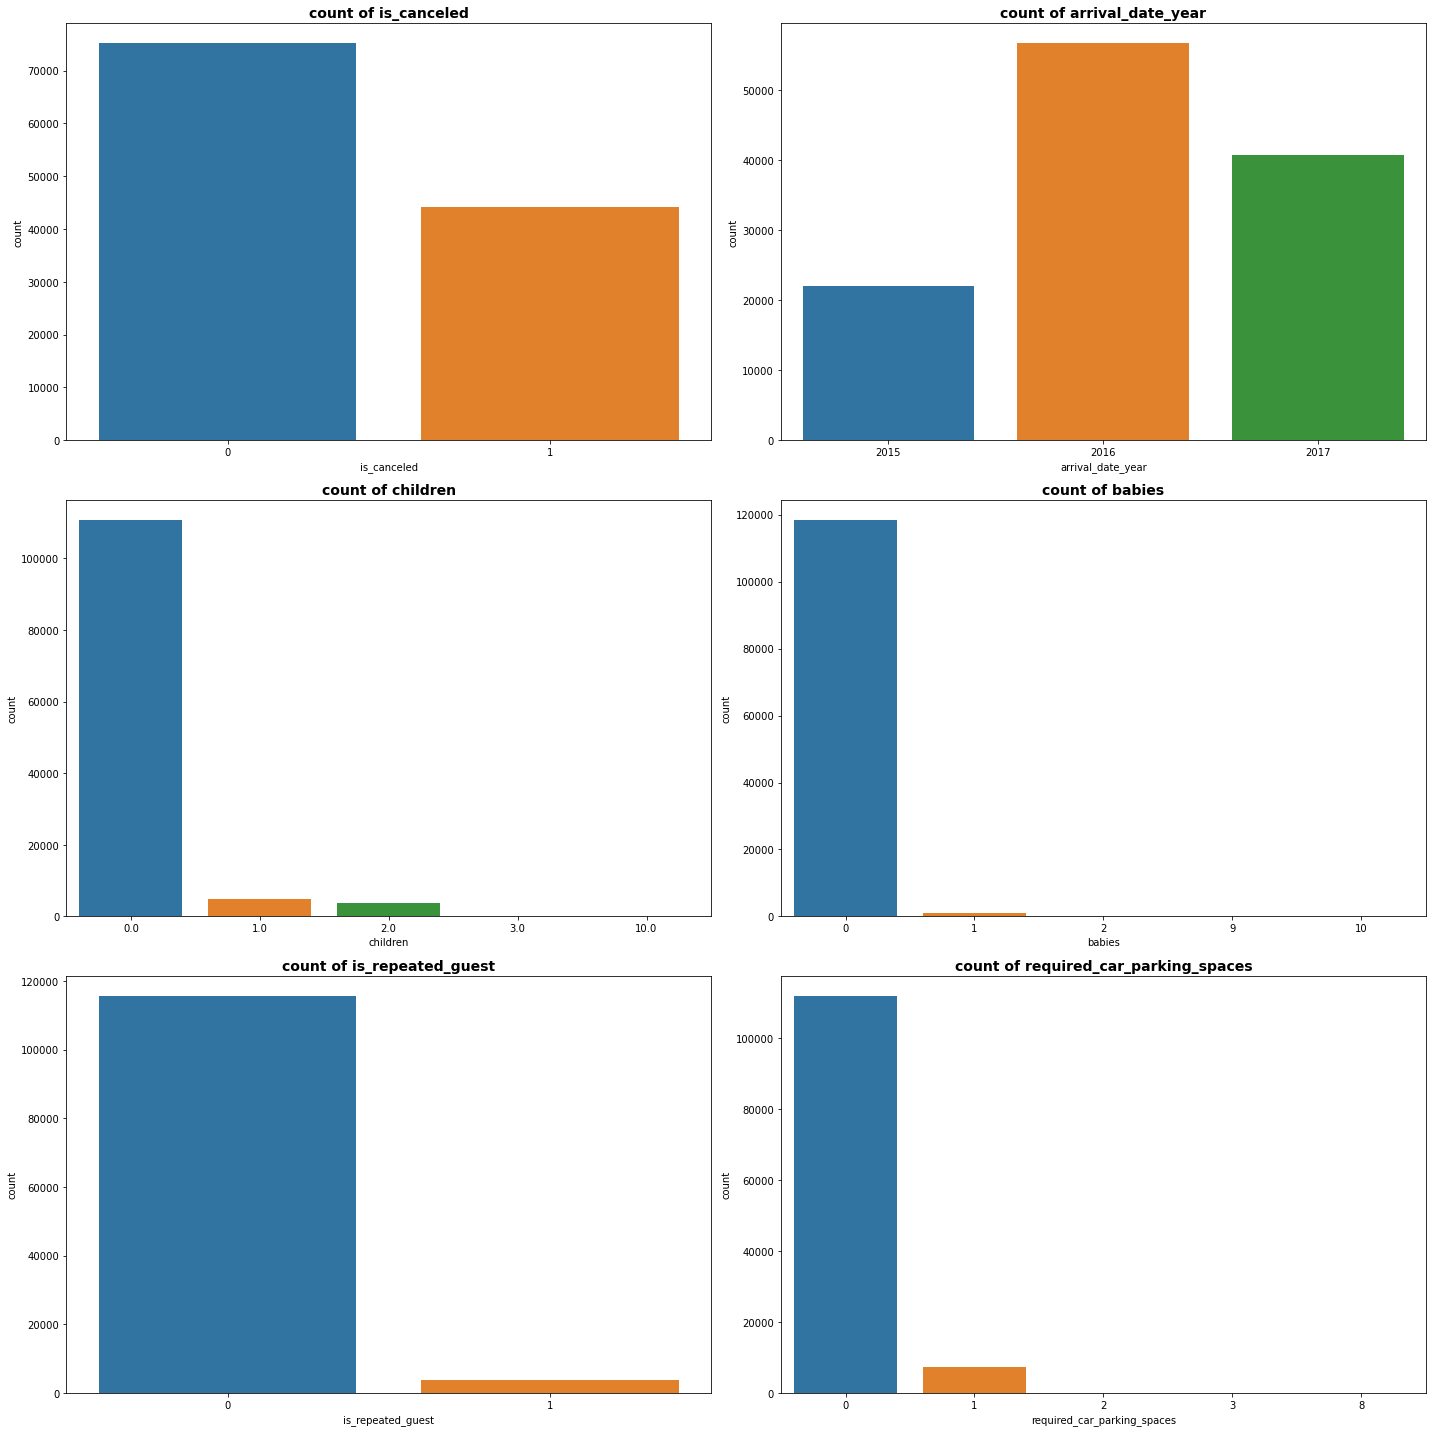

In [72]:
# create count plot for features inside the num_count
fig3, ax = plt.subplots(nrows=3,ncols=2,figsize=(20,20))
for i,f in list(enumerate(num_count)):
    sns.countplot(df[f],ax=fig3.axes[i])
    fig3.axes[i].set_title(f"count of {f}",fontweight='bold',fontsize=14)

plt.tight_layout()
plt.show()

In [73]:
# check the number of chart that should be create to determine the figure layout
len(num_dist)

14

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


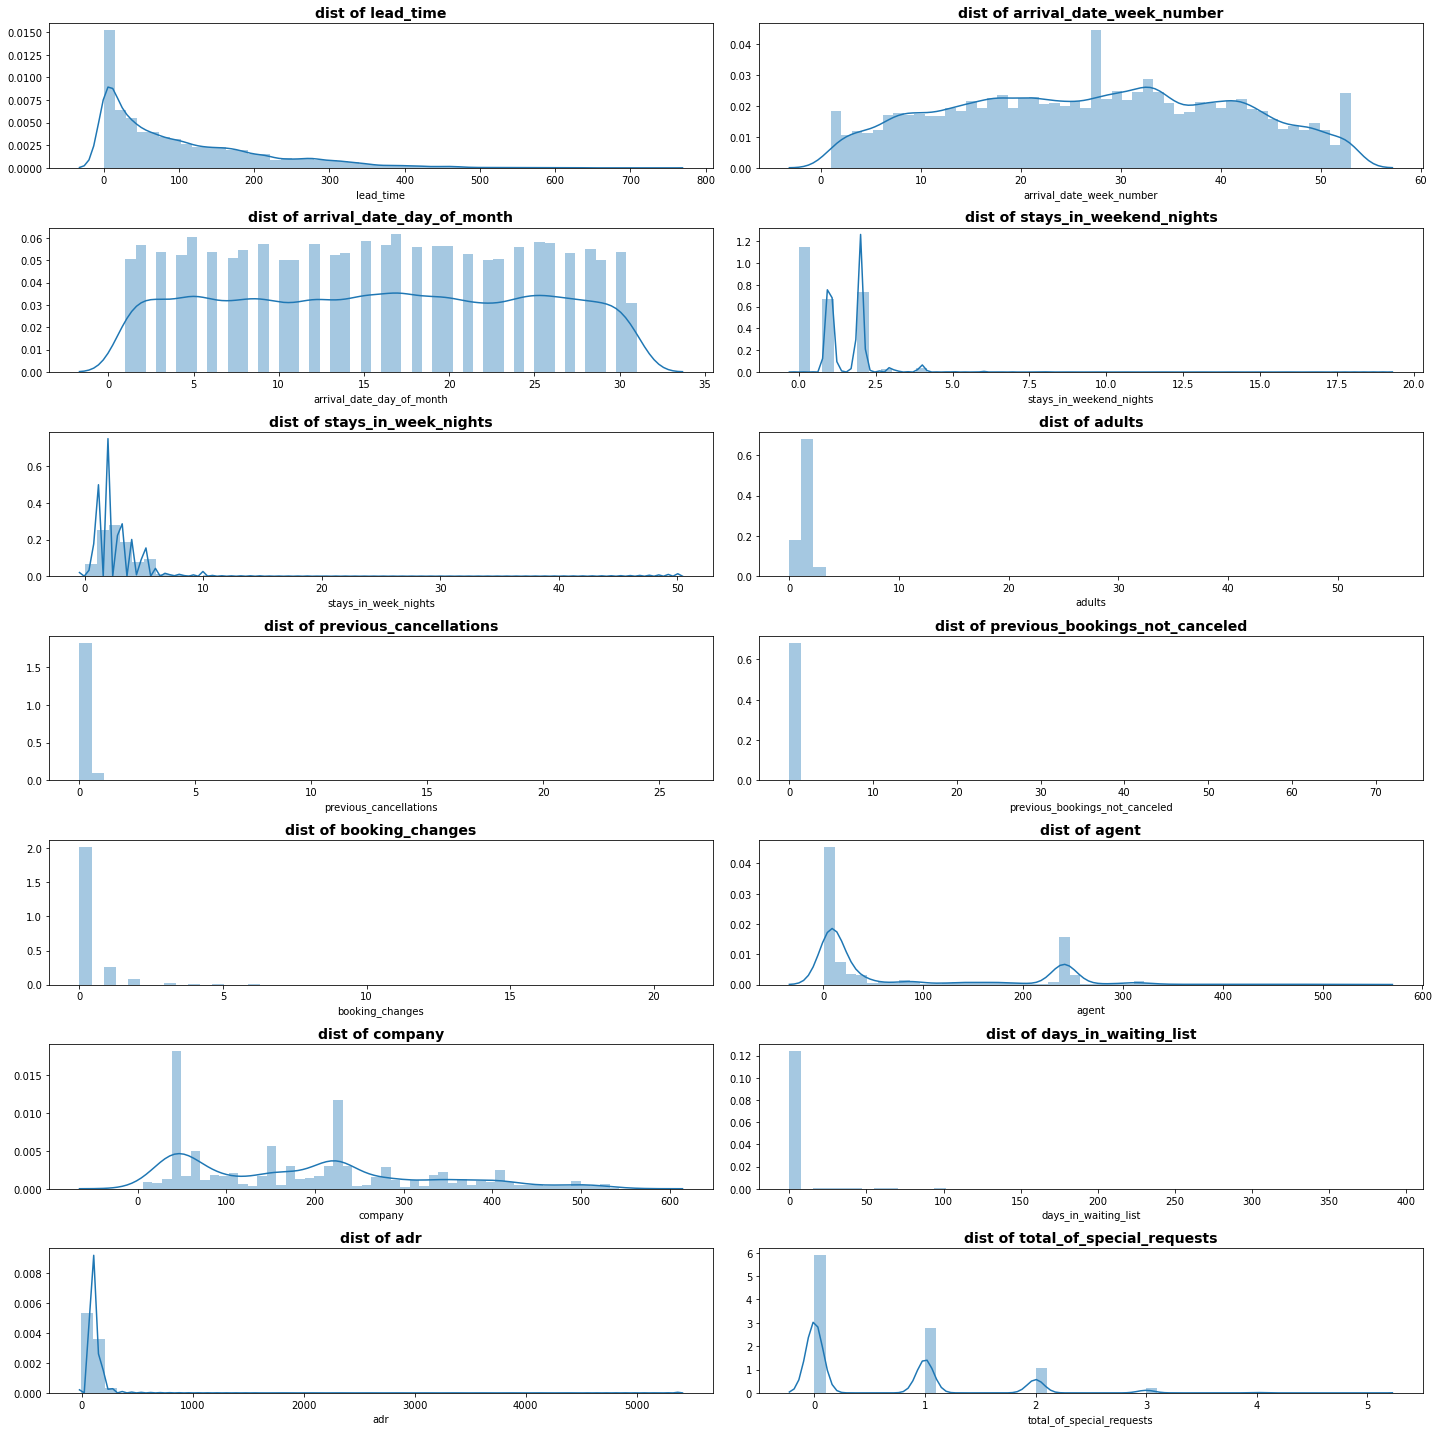

In [74]:
# create distribution plot for features inside the num_dist
fig4, ax = plt.subplots(nrows=7,ncols=2,figsize=(20,20))
for i,f in list(enumerate(num_dist)):
    sns.distplot(df[f],ax=fig4.axes[i],bins=50)
    fig4.axes[i].set_title(f"dist of {f}",fontweight='bold',fontsize=14)

plt.tight_layout()
plt.show()

Before we build our machine learning model, we should clean our dataset from null value.

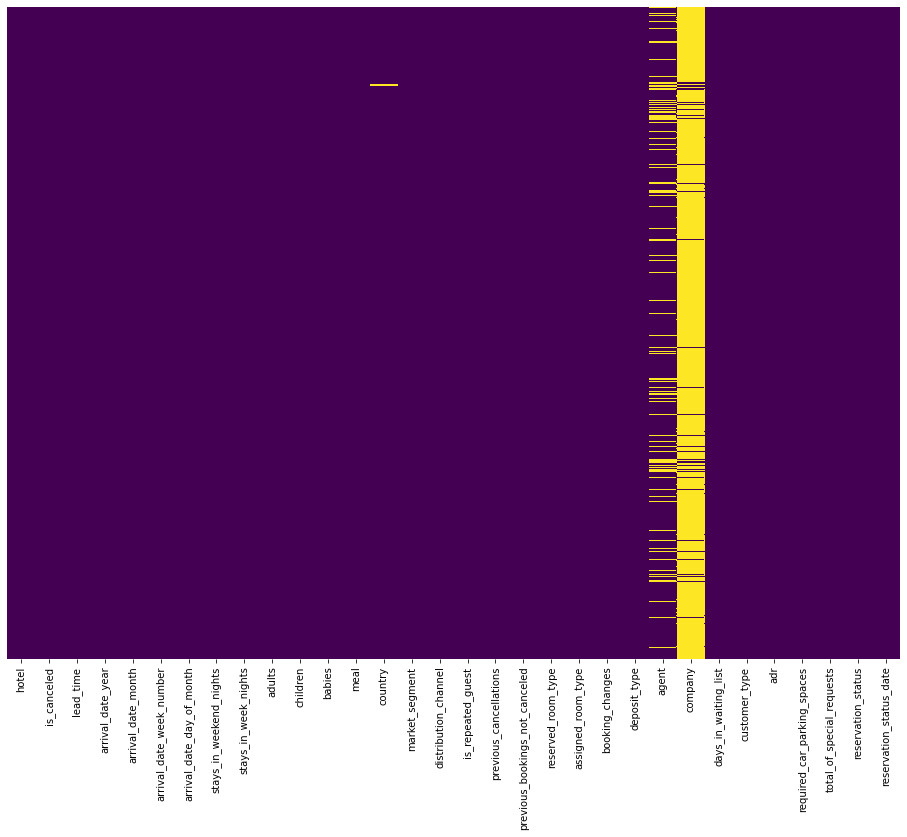

In [75]:
# check the presence of null value in the features
plt.figure(figsize=(16,12))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [76]:
# calculate the null rate for each features
for i in df.columns:
    null_rate = df[i].isnull().sum()/len(df)*100
    if null_rate > 0:
        print("{}'s null rate: {}%".format(i,round(null_rate,2)))

children's null rate: 0.0%
country's null rate: 0.41%
agent's null rate: 13.69%
company's null rate: 94.31%


In [77]:
df['agent'].min()

1.0

I'd like to drop 'company' feature becasue it has a lot of null_value. Then for the 'agent', I will assign the null value with 0. Finally, I would drop the remaining null value, considering it is only small number.

In [78]:
# hadling the null value
df.drop('company',axis=1,inplace=True)
df['agent'].fillna(0,inplace=True)
df.dropna(inplace=True)

In [79]:
# check is there any null value left
df.isnull().values.any()

False

In [80]:
# drop 'reservation_status' and 'reservation_status_date' becasue it is already represented in another feature
df.drop(['reservation_status','reservation_status_date'],axis=1,inplace=True)

In [81]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1


In [82]:
# convert categorical feature into numeric so that our machine learning model can work
hotel = pd.get_dummies(df['hotel'],drop_first=True)
arrival_date_month = pd.get_dummies(df['arrival_date_month'],drop_first=True)
meal = pd.get_dummies(df['meal'],drop_first=True)
country = pd.get_dummies(df['country'],drop_first=True)
market_segment = pd.get_dummies(df['market_segment'],drop_first=True)
distribution_channel = pd.get_dummies(df['distribution_channel'],drop_first=True)
reserved_room_type = pd.get_dummies(df['reserved_room_type'],drop_first=True)
assigned_room_type = pd.get_dummies(df['assigned_room_type'],drop_first=True)
deposit_type = pd.get_dummies(df['deposit_type'],drop_first=True)
customer_type = pd.get_dummies(df['customer_type'],drop_first=True)

In [83]:
# drop the original categorical feature because it is no longer used
df.drop(cat_feat['feature'][:-2],axis=1,inplace=True)

In [84]:
# combine the dummies into main dataframe
df = pd.concat([hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,df],axis=1)

In [85]:
# is there any categorical feature left?
c_feat_types = pd.DataFrame(df.dtypes,columns=['type'])
c_feat_types.reset_index(inplace=True)
c_feat_types.rename(columns={'index':'feature'},inplace=True)
check = c_feat_types[c_feat_types['type']  == 'object']
check

,feature,type


Finally, lets build our machine learning model, I'd like to use 3 machine learning model for classification which are :
- Linear Regression
- Decision Tree
- Random Forest

All of this model come from sklearn library package. At the end, I will compare to decide which model is better.

In [86]:
# import train_test_split to separate between training and test data
from sklearn.model_selection import train_test_split

In [87]:
# define the feature and the target
X = df.drop('is_canceled',axis=1)
y = df['is_canceled']

In [88]:
# create the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
# import Logistic Regression model from sklearn
from sklearn.linear_model import LogisticRegression

In [90]:
# create the LR model
lr = LogisticRegression()

In [91]:
# train the LR model
lr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
# make a prediction for the LR model
lr_pred = lr.predict(X_test)

In [93]:
# import classification_report and confusion matric for model evaluation
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_fscore_support

In [94]:
# print the model evaluation result for LR model
print(confusion_matrix(y_test,lr_pred))
print('/n')
print(classification_report(y_test,lr_pred))

[[20111  2207]
 [ 5680  7672]]
/n
              precision    recall  f1-score   support

           0       0.78      0.90      0.84     22318
           1       0.78      0.57      0.66     13352

    accuracy                           0.78     35670
   macro avg       0.78      0.74      0.75     35670
weighted avg       0.78      0.78      0.77     35670



In [95]:
# import Decision Tree model from sklearn
from sklearn.tree import DecisionTreeClassifier

In [96]:
# create the DT model
dt = DecisionTreeClassifier()

In [97]:
# train the DT model
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [98]:
# make a prediction for DT model
dt_pred = dt.predict(X_test)

In [99]:
# print the model evaluation result for DT model
print(confusion_matrix(y_test,dt_pred))
print('/n')
print(classification_report(y_test,dt_pred))

[[19730  2588]
 [ 2579 10773]]
/n
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     22318
           1       0.81      0.81      0.81     13352

    accuracy                           0.86     35670
   macro avg       0.85      0.85      0.85     35670
weighted avg       0.86      0.86      0.86     35670



In [100]:
# import Random Forest model from sklearn
from sklearn.ensemble import RandomForestClassifier

In [101]:
# create the RFC model
rfc = RandomForestClassifier()

In [102]:
# train the RFC model
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [103]:
# make a prediction for RFC model
rfc_pred = rfc.predict(X_test)

In [104]:
# print the model evaluation result for RFC model
print(confusion_matrix(y_test,rfc_pred))
print('/n')
print(classification_report(y_test,rfc_pred))

[[20972  1346]
 [ 2615 10737]]
/n
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     22318
           1       0.89      0.80      0.84     13352

    accuracy                           0.89     35670
   macro avg       0.89      0.87      0.88     35670
weighted avg       0.89      0.89      0.89     35670



In [105]:
# Summarize the evaluation result into one dataframe
lr_result = pd.DataFrame(precision_recall_fscore_support(y_test,lr_pred),index=['precision','recall','fscore','support'],columns=['0_lr','1_lr'])
dt_result = pd.DataFrame(precision_recall_fscore_support(y_test,dt_pred),index=['precision','recall','fscore','support'],columns=['0_dt','1_dt'])
rfc_result = pd.DataFrame(precision_recall_fscore_support(y_test,rfc_pred),index=['precision','recall','fscore','support'],columns=['0_rfc','1_rfc'])
all_result = pd.concat([lr_result,dt_result,rfc_result],axis=1)
all_result = all_result.transpose(copy=True)
all_result.reset_index(inplace=True)
all_result[['target','algorithm']] = all_result['index'].str.split("_",expand=True)
all_result.drop('index',axis=1,inplace=True)
all_result

,precision,recall,fscore,support,target,algorithm
0,0.779768,0.901111,0.836060,22318.0,0,lr
1,0.776597,0.574596,0.660497,13352.0,1,lr
2,0.884396,0.884040,0.884218,22318.0,0,dt
3,0.806302,0.806845,0.806574,13352.0,1,dt
4,0.889134,0.939690,0.913713,22318.0,0,rfc
5,0.888604,0.804149,0.844270,13352.0,1,rfc


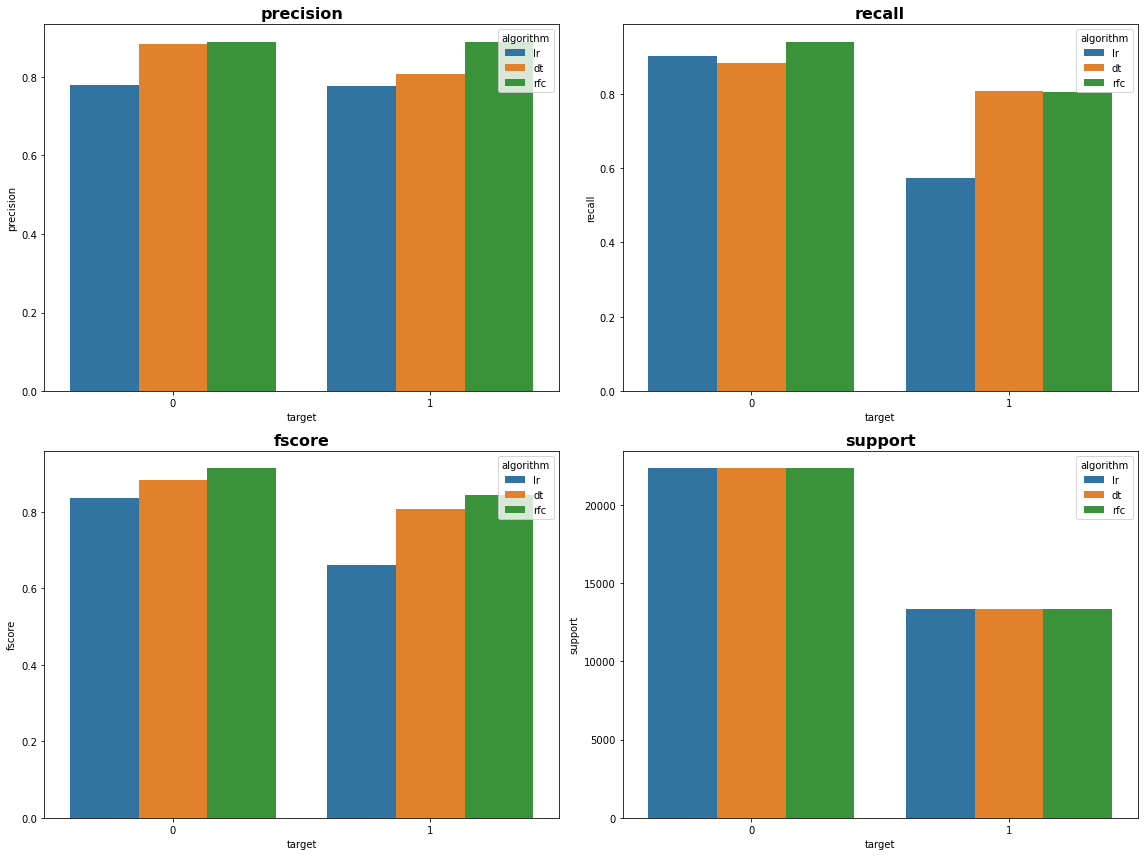

In [106]:
# visualize the comparation result
fig5, ax = plt.subplots(nrows=2,ncols=2,figsize=(16,12))
for i,f in enumerate(['precision','recall','fscore','support']):
    sns.barplot(x='target',y=f,data=all_result,hue='algorithm',ax=fig5.axes[i])
    fig5.axes[i].set_title(f,fontsize=16,fontweight='bold')
    
plt.tight_layout()
plt.show()

Based on precision, recall, and  fscore value, **Random Forest is the best model for this classification task**.

# Thank You